In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp2d, RectBivariateSpline

# Nsi

In [2]:
features = ['theta13', 'theta23', 'deltacp', 'emu', 'etau', 'mumu']

In [3]:
chi_limit = 2.3

In [4]:
def plot_graph_nsi(x, y, c, n, a, b, i):
    #plt.figure(figsize = (12, 12))
    plt.subplot(5, 5, i)
    plt.scatter(x, y, c=c)
    plt.colorbar()
    plt.title('{}'.format(n), fontsize=20)
    plt.xlabel(a, fontsize=20)
    plt.ylabel(b, fontsize=20)
    plt.clim(0, chi_limit)
    #plt.show()

In [5]:
def func_nsi(a, b, i):
    x = []
    y = []
    chi2 = []
    with open("./ver3_chi_{}_{}.dat".format(a, b)) as f:
        f.readline()
        while True:
            arr = [float(s) for s in f.readline().split()]
            if len(arr) == 0:
                f.close()
                break
            x.append(arr[0])
            y.append(arr[1])
            chi2.append(arr[2])
    rad = ['theta13', 'theta23', 'deltacp']
    if a in rad: x = np.array(x) * 180 / np.pi
    if b in rad: y = np.array(y) * 180 / np.pi
    #loc = np.where(np.array(chi2) < 5.99)
    plot_graph_nsi(x, y, chi2, 'Nsi 1 sigma Contour', a, b, i)
#     if len(loc) > 1:
#         plot_graph(x[loc], y[loc], chi2[loc], 'chi-square value two sigma', a, b, i)

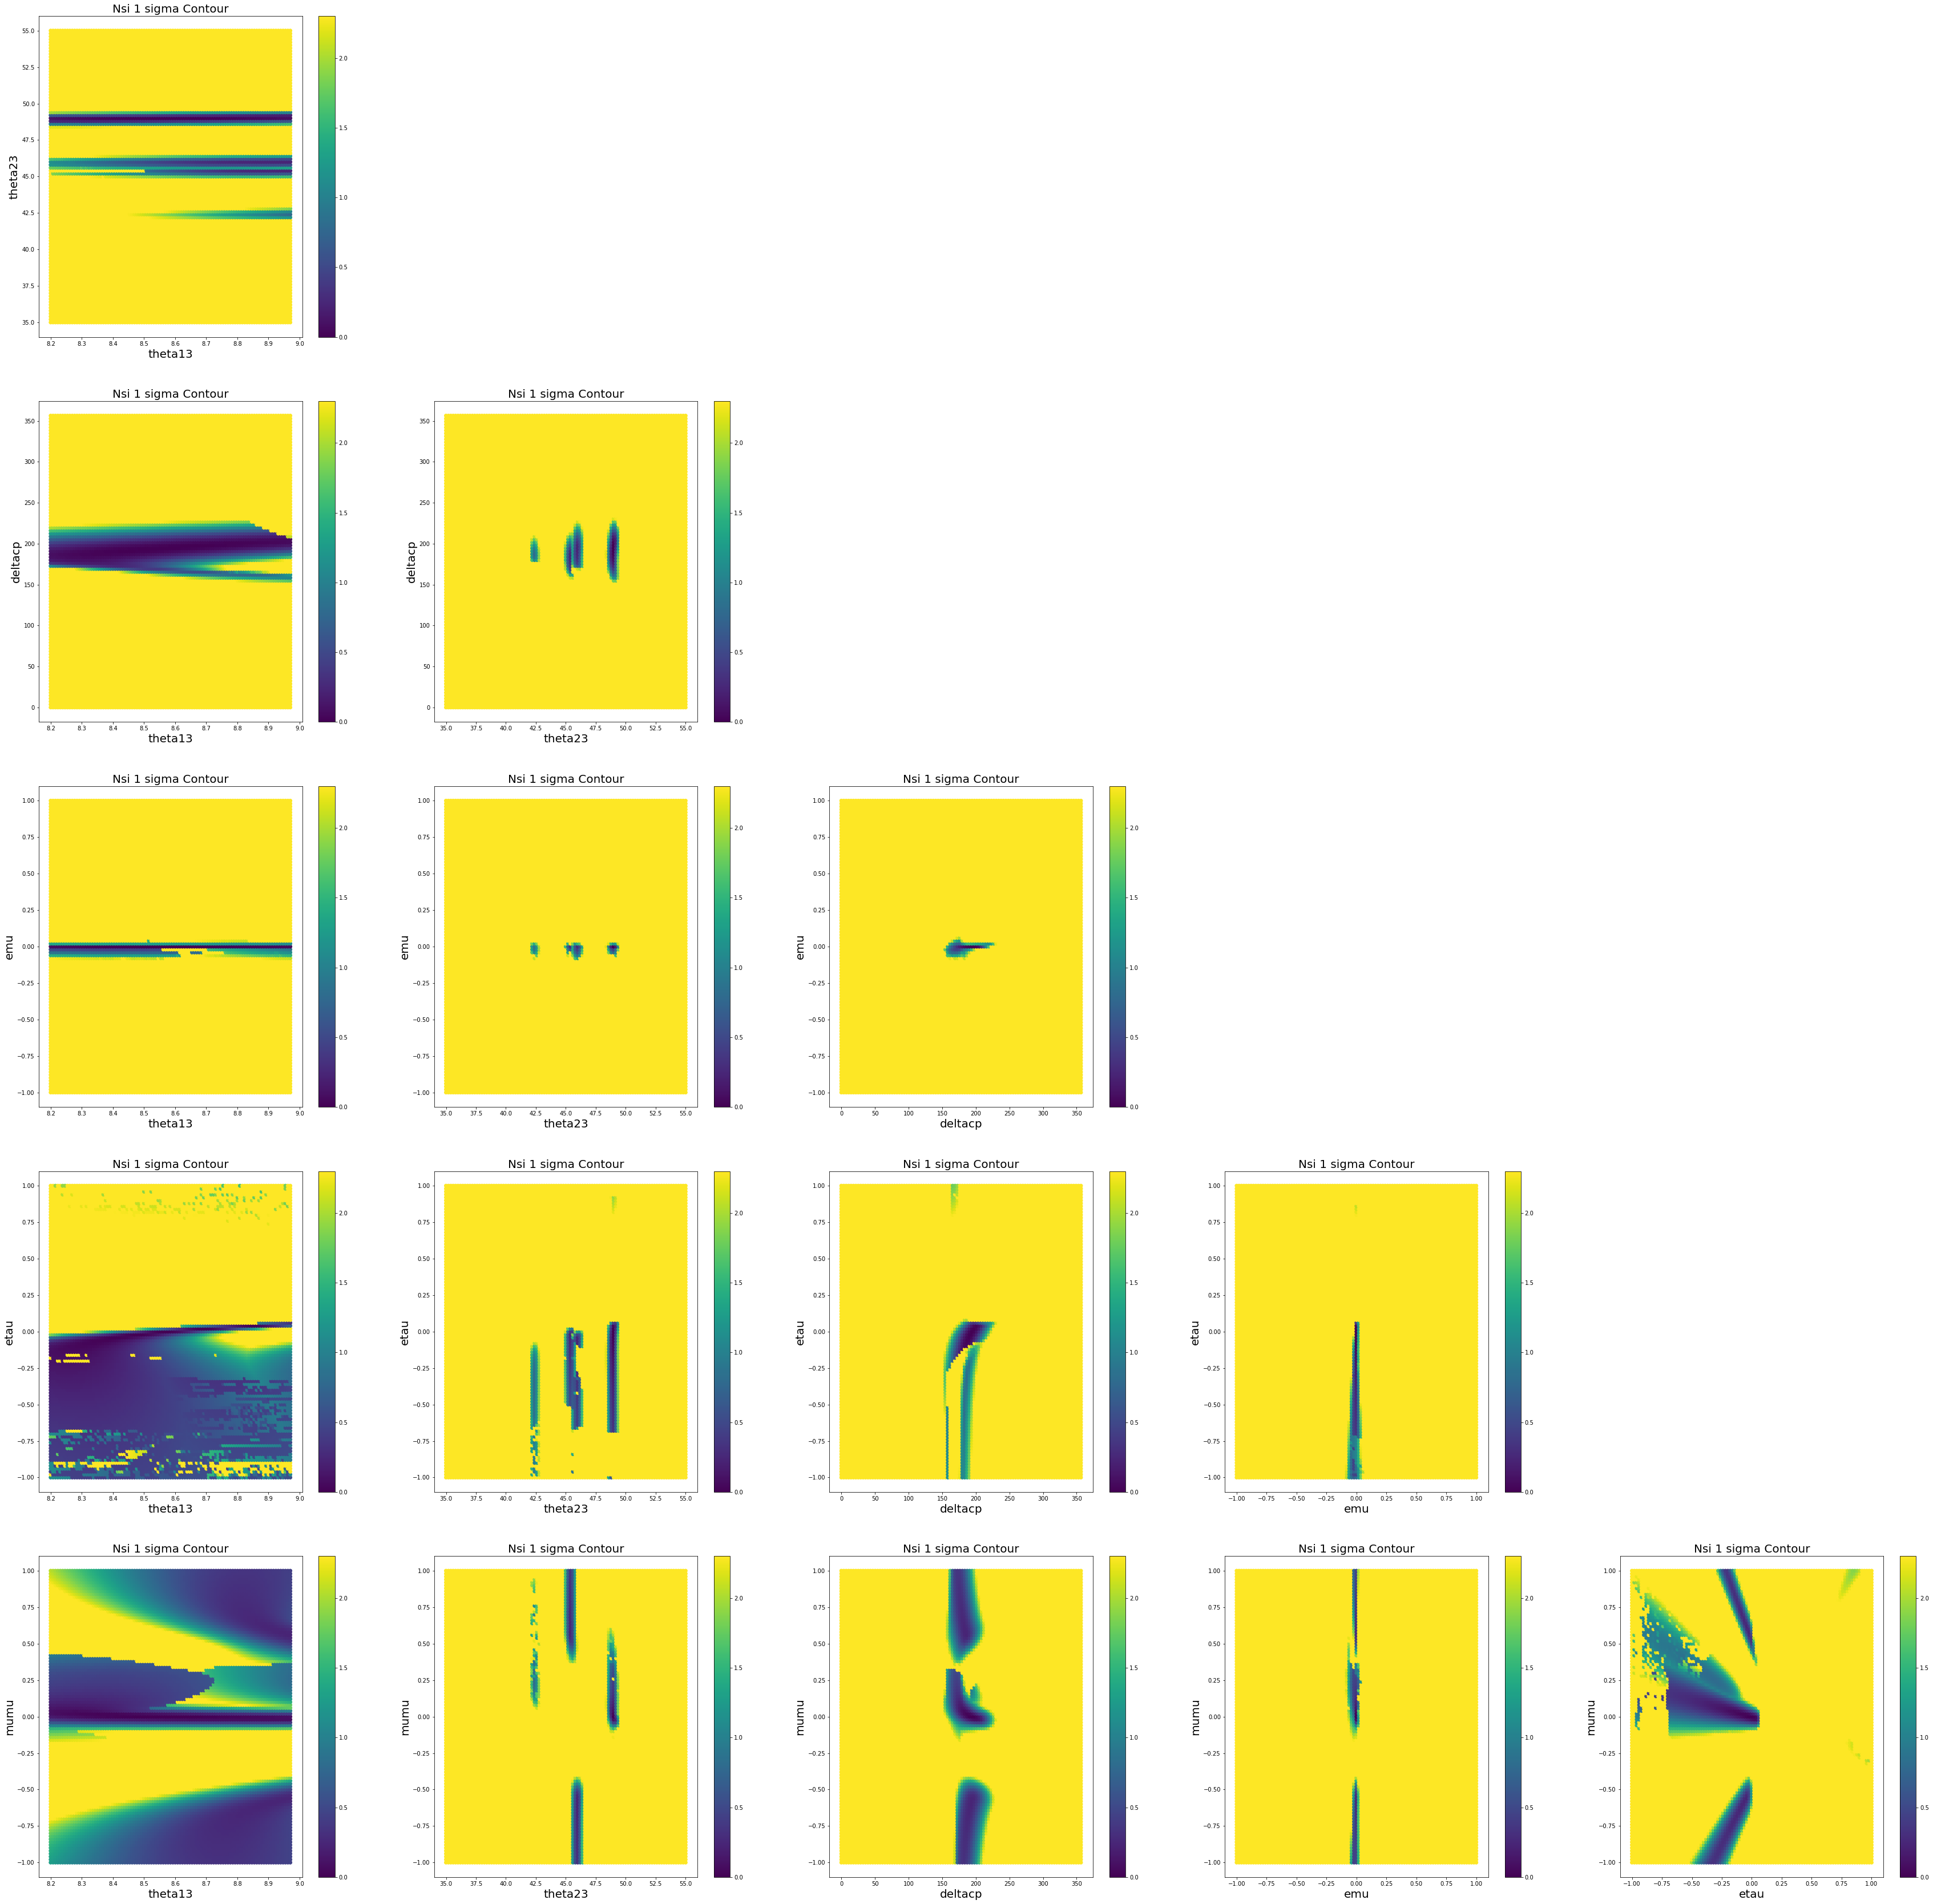

In [33]:
count = -1
index_ = [1,6,11,16,21,7,12,17,22,13,18,23,19,24,25]
plt.figure(figsize = (60, 60))
for i, p1 in enumerate(features):
    for p2 in features[i+1:]:
        count+=1
#         print(p1)
#         print(p2)
        func_nsi(p1, p2, index_[count])
plt.savefig('Nsi_1sigma_contour.jpg')
plt.show()

# Nsi vs No-Nsi

In [7]:
features_no_nsi = ['theta13', 'theta23', 'deltacp']

In [8]:
def plot_graph_no_nsi(x, y, c, n, a, b, i):
    #plt.figure(figsize = (12, 12))
    plt.subplot(3, 2, i)
    plt.scatter(x, y, c=c)
    plt.colorbar()
    plt.title('{}'.format(n), fontsize=20)
    plt.xlabel(a, fontsize=20)
    plt.ylabel(b, fontsize=20)
    plt.clim(0, chi_limit)
    #plt.show()

In [22]:
def func_no_nsi(a, b, i):
    x = []
    y = []
    chi2 = []
    with open("./ver3_chi_{}_{}_no_nsi.dat".format(a, b)) as f:
        f.readline()
        while True:
            arr = [float(s) for s in f.readline().split()]
            if len(arr) == 0:
                f.close()
                break
            x.append(arr[0])
            y.append(arr[1])
            chi2.append(arr[2])
    rad = ['theta13', 'theta23', 'deltacp']
    if a in rad: x = np.array(x) * 180 / np.pi
    if b in rad: y = np.array(y) * 180 / np.pi
    loc = np.where(np.array(chi2) < 5.99)
    plot_graph_no_nsi(x, y, chi2, 'No Nsi 1 sigma Contour', a, b, i )
    if len(loc) > 1:
        plot_graph(x[loc], y[loc], chi2[loc], 'chi-square value two sigma', a, b)

In [23]:
def func_with_nsi(a, b, i):
    x = []
    y = []
    chi2 = []
    with open("./ver3_chi_{}_{}.dat".format(a, b)) as f:
        f.readline()
        while True:
            arr = [float(s) for s in f.readline().split()]
            if len(arr) == 0:
                f.close()
                break
            x.append(arr[0])
            y.append(arr[1])
            chi2.append(arr[2])
    rad = ['theta13', 'theta23', 'deltacp']
    if a in rad: x = np.array(x) * 180 / np.pi
    if b in rad: y = np.array(y) * 180 / np.pi
    #loc = np.where(np.array(chi2) < 5.99)
    plot_graph_no_nsi(x, y, chi2, 'Nsi 1 sigma Contour', a, b, i)
#     if len(loc) > 1:
#         plot_graph(x[loc], y[loc], chi2[loc], 'chi-square value two sigma', a, b, i)

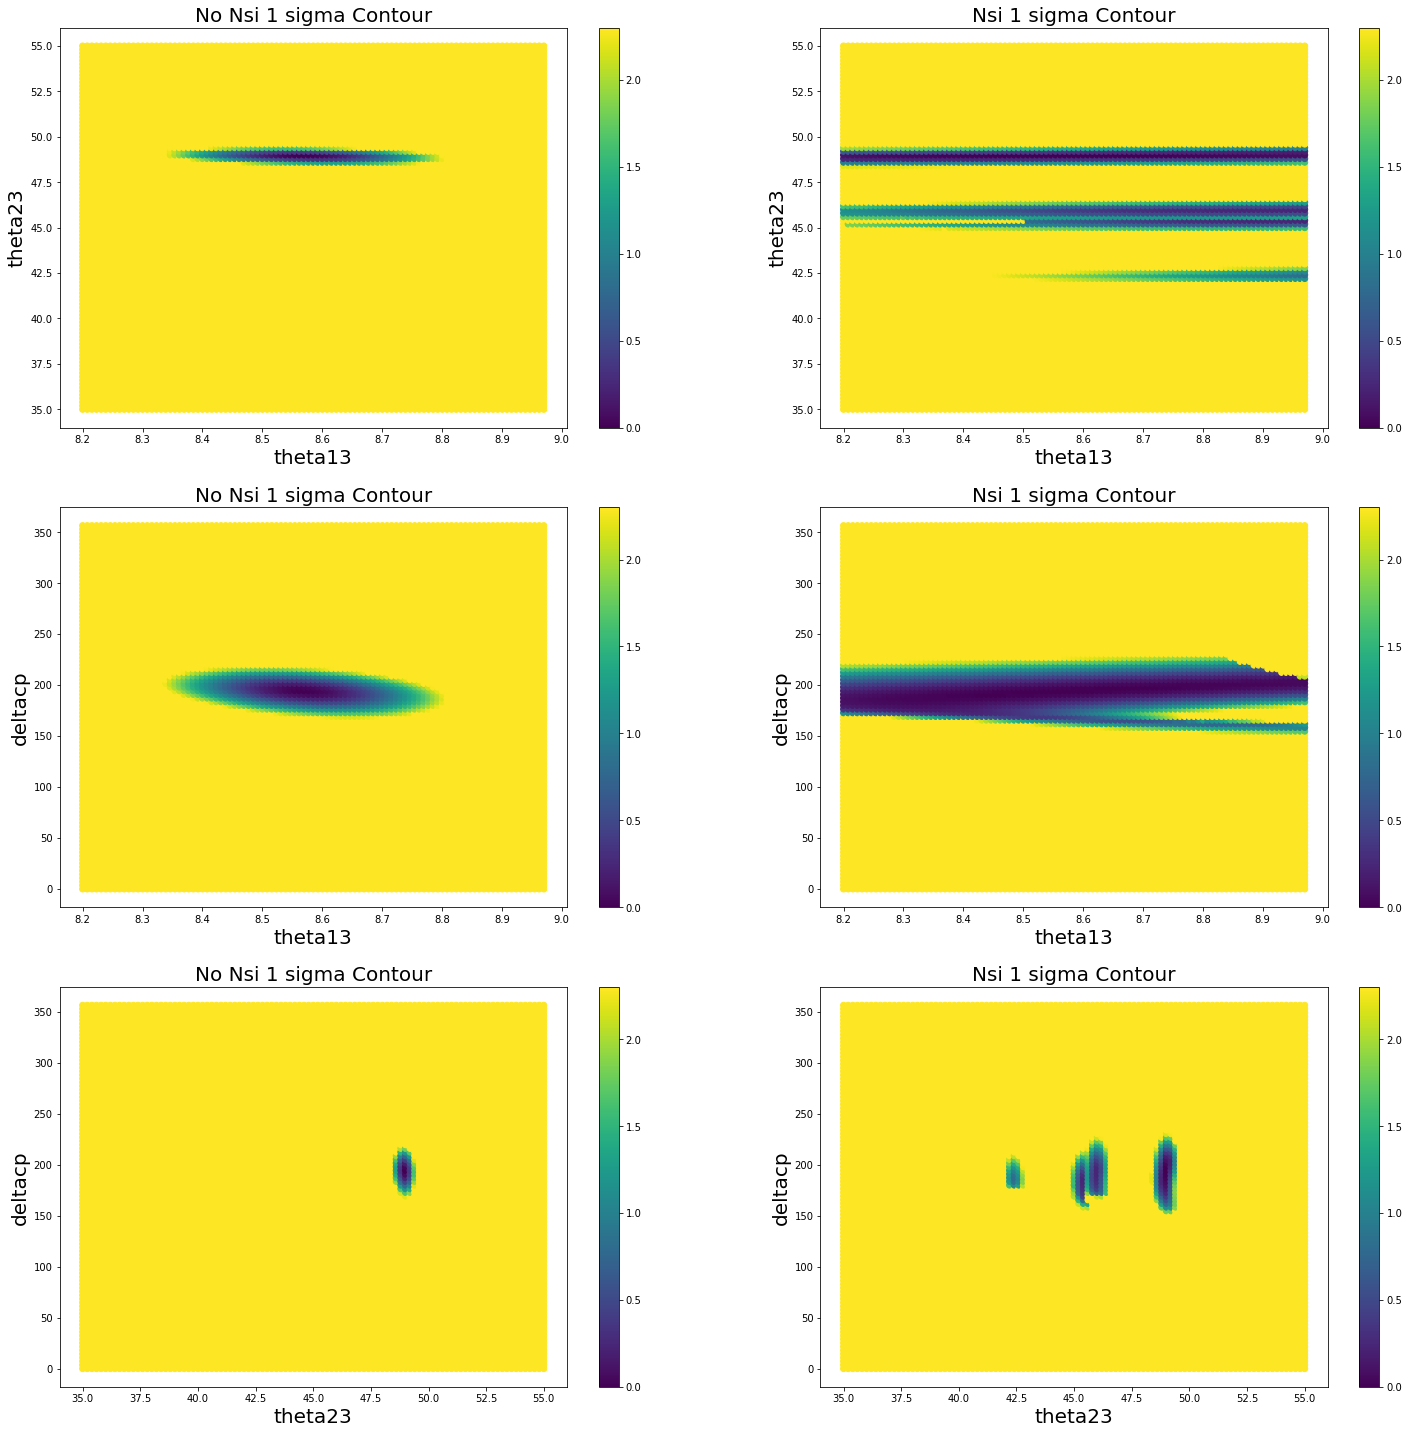

In [32]:
plt.figure(figsize = (25, 25))
count = 0
for i, p1 in enumerate(features_no_nsi):
    for p2 in features_no_nsi[i+1:]:
        count+=1
        func_no_nsi(p1, p2, count)
        count+=1
        func_with_nsi(p1, p2, count)
plt.savefig('Nsi vs No-Nsi 1sigma_contour.jpg')
plt.show()

In [12]:
features = ['theta13', 'theta23', 'deltacp', 'emu', 'etau', 'mumu']

In [13]:
chi_limit = 2.3

In [14]:
def plot_graph(x, y, c, n, a, b):
    plt.figure(figsize = (12, 12))
    plt.scatter(x, y, c=c)
    plt.colorbar()
    plt.title('NuFit {}'.format(n), fontsize=20)
    plt.xlabel(a, fontsize=20)
    plt.ylabel(b, fontsize=20)
    plt.clim(0, chi_limit)
    plt.show()

In [15]:
def func(a, b):
    x = []
    y = []
    chi2 = []
    with open("./ver3_chi_{}_{}.dat".format(a, b)) as f:
        print(f.readline())
        while True:
            arr = [float(s) for s in f.readline().split()]
            if len(arr) == 0:
                f.close()
                break
            x.append(arr[0])
            y.append(arr[1])
            chi2.append(arr[2])
    rad = ['theta13', 'theta23', 'deltacp']
    if a in rad: x = np.array(x) * 180 / np.pi
    if b in rad: y = np.array(y) * 180 / np.pi
    loc = np.where(np.array(chi2) < 5.99)
    plot_graph(x, y, chi2, 'chi-square value_full', a, b)
    if len(loc) > 1:
        plot_graph(x[loc], y[loc], chi2[loc], 'chi-square value two sigma', a, b)

In [16]:
for i, p1 in enumerate(features):
    for p2 in features[i+1:]:
#         print(p1)
#         print(p2)
        func_nsi(p1, p2)

TypeError: func_nsi() missing 1 required positional argument: 'i'

In [ ]:
features_no_nsi = ['theta13', 'theta23', 'deltacp']

In [ ]:
def func_no_nsi(a, b):
    x = []
    y = []
    chi2 = []
    with open("./ver3_chi_{}_{}_no_nsi.dat".format(a, b)) as f:
        print(f.readline())
        while True:
            arr = [float(s) for s in f.readline().split()]
            if len(arr) == 0:
                f.close()
                break
            x.append(arr[0])
            y.append(arr[1])
            chi2.append(arr[2])
    rad = ['theta13', 'theta23', 'deltacp']
    if a in rad: x = np.array(x) * 180 / np.pi
    if b in rad: y = np.array(y) * 180 / np.pi
    loc = np.where(np.array(chi2) < 5.99)
    plot_graph(x, y, chi2, 'chi-square value_full', a, b)
    if len(loc) > 1:
        plot_graph(x[loc], y[loc], chi2[loc], 'chi-square value two sigma', a, b)

In [ ]:
for i, p1 in enumerate(features_no_nsi):
    for p2 in features_no_nsi[i+1:]:
        func_no_nsi(p1, p2)

In [ ]:
func_no_nsi("theta23", "deltacp")
func_nsi("theta23", "deltacp")

In [ ]:
func_no_nsi("theta13", "theta23")
func_nsi("theta13", "theta23")

In [ ]:
func_no_nsi("theta13", "deltacp")
func_nsi("theta13", "deltacp")